# Preprocessing
In this notebook we will preprocess the data. We will:
1. Detect the language of the summaries and remove or correct the summaries that are not in English
2. Clean the text by:
    - Lowercasing
    - Removing punctuation
    - Removing numbers
    - Removing stopwords
    - Lemmatization
3. 

## Importing libraries

In [201]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect_langs
import pandas as pd
import textstat
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/mstrzezon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mstrzezon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mstrzezon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mstrzezon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Reading Data from CSV

In [79]:
csv_file = "../../data/arxiv.csv"
data = pd.read_csv(csv_file, sep=";")
data.head(10)

,ID,Title,Summary,Published,PDF Link
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1
5,http://arxiv.org/abs/cs/0003020v2,ACLP: Integrating Abduction and Constraint Sol...,ACLP is a system which combines abductive reas...,2000-03-07T22:47:13Z,http://arxiv.org/pdf/cs/0003020v2
6,http://arxiv.org/abs/cs/0003021v1,Relevance Sensitive Non-Monotonic Inference on...,We present a method for relevance sensitive no...,2000-03-08T03:03:36Z,http://arxiv.org/pdf/cs/0003021v1
7,http://arxiv.org/abs/cs/0003024v1,A Compiler for Ordered Logic Programs,"This paper describes a system, called PLP, for...",2000-03-08T10:15:51Z,http://arxiv.org/pdf/cs/0003024v1
8,http://arxiv.org/abs/cs/0003028v1,Logic Programs with Compiled Preferences,We describe an approach for compiling preferen...,2000-03-08T14:09:56Z,http://arxiv.org/pdf/cs/0003028v1
9,http://arxiv.org/abs/cs/0003031v1,Optimal Belief Revision,We propose a new approach to belief revision t...,2000-03-08T15:54:50Z,http://arxiv.org/pdf/cs/0003031v1


## Summaries language detection
Because we are going to use the summaries to train the model, we need to make sure that all summaries are in English. We will use the langdetect library to detect the language of the summaries.

In [80]:
def detect_langs_in_text(text):
    return detect_langs(text)

In [81]:
data['Languages'] = data.apply(lambda row: detect_langs(row['Summary']), axis=1)

In [82]:
data.head(10)

,ID,Title,Summary,Published,PDF Link,Languages
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,[en:0.9999957250362435]
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,[en:0.9999983344556466]
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,[en:0.9999978334328925]
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,[en:0.9999959952150621]
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,[en:0.9999980176626395]
5,http://arxiv.org/abs/cs/0003020v2,ACLP: Integrating Abduction and Constraint Sol...,ACLP is a system which combines abductive reas...,2000-03-07T22:47:13Z,http://arxiv.org/pdf/cs/0003020v2,[en:0.9999960830903292]
6,http://arxiv.org/abs/cs/0003021v1,Relevance Sensitive Non-Monotonic Inference on...,We present a method for relevance sensitive no...,2000-03-08T03:03:36Z,http://arxiv.org/pdf/cs/0003021v1,[en:0.9999957722914825]
7,http://arxiv.org/abs/cs/0003024v1,A Compiler for Ordered Logic Programs,"This paper describes a system, called PLP, for...",2000-03-08T10:15:51Z,http://arxiv.org/pdf/cs/0003024v1,[en:0.9999979998207567]
8,http://arxiv.org/abs/cs/0003028v1,Logic Programs with Compiled Preferences,We describe an approach for compiling preferen...,2000-03-08T14:09:56Z,http://arxiv.org/pdf/cs/0003028v1,[en:0.9999972054848217]
9,http://arxiv.org/abs/cs/0003031v1,Optimal Belief Revision,We propose a new approach to belief revision t...,2000-03-08T15:54:50Z,http://arxiv.org/pdf/cs/0003031v1,[en:0.9999978831887276]


Check what summaries are not only in English

In [83]:
def is_only_english(languages):
    if len(languages) == 1 and languages[0].lang == 'en':
        return True

    return False

In [84]:
data['Only english'] = data.apply(lambda row: is_only_english(row['Languages']), axis=1)

In [85]:
data['Only english'].value_counts()

Only english
True     34561
False       14
Name: count, dtype: int64

We see that there are some summaries that are not only in english. Let's check them.

In [86]:
data_not_english = data[data['Only english'] == False]

In [52]:
data_not_english

,ID,Title,Summary,Published,PDF Link,Languages,Only english
1613,http://arxiv.org/abs/1309.2351v1,Elementos de ingeniería de explotación de la i...,By introducing elements of information mining ...,2013-09-10T00:42:05Z,http://arxiv.org/pdf/1309.2351v1,"[en:0.7142841210646318, pt:0.28571376254418346]",False
2022,http://arxiv.org/abs/1511.04352v3,Introduzione all'Intelligenza Artificiale,The paper presents an introduction to Artifici...,2015-11-13T16:40:47Z,http://arxiv.org/pdf/1511.04352v3,"[it:0.5714256755838134, en:0.42857235011318273]",False
4183,http://arxiv.org/abs/2009.03420v3,A Hybrid Neuro-Symbolic Approach for Complex E...,Training a model to detect patterns of interre...,2020-09-07T21:05:51Z,http://arxiv.org/pdf/2009.03420v3,"[en:0.8571403444193779, it:0.142856394434529]",False
4777,http://arxiv.org/abs/2207.10330v1,Reinforcement learning for Energies of the fut...,Current rapid changes in climate increase the ...,2022-07-21T06:56:46Z,http://arxiv.org/pdf/2207.10330v1,"[en:0.857141561324349, fr:0.1428569614533779]",False
6444,http://arxiv.org/abs/cs/0503059v2,Les représentations génétiques d'objets : simp...,"Depuis une trentaine d'ann\'{e}es, les ing\'{e...",2005-03-23T08:01:10Z,http://arxiv.org/pdf/cs/0503059v2,"[fr:0.5714268084781878, en:0.42857256822406076]",False
7646,http://arxiv.org/abs/1907.00934v2,"Ich weiß, was du nächsten Sommer getan haben w...","Predictive policing is a data-based, predictiv...",2019-07-01T17:13:56Z,http://arxiv.org/pdf/1907.00934v2,"[en:0.7142846042386468, de:0.285714155712598]",False
7862,http://arxiv.org/abs/1207.1361v1,Local Utility Elicitation in GAI Models,Structured utility models are essential for th...,2012-07-04T16:02:36Z,http://arxiv.org/pdf/1207.1361v1,"[en:0.8571397000270464, it:0.14285806137644097]",False
8485,http://arxiv.org/abs/1709.02759v1,Semantic Preserving Embeddings for Generalized...,A new approach to the study of Generalized Gra...,2017-09-07T10:58:37Z,http://arxiv.org/pdf/1709.02759v1,"[en:0.8571403562911507, es:0.1428592871089775]",False
10940,http://arxiv.org/abs/2207.10479v1,"Wer ist schuld, wenn Algorithmen irren? Entsch...",Algorithmic decision support (ADS) is increasi...,2022-07-21T13:45:10Z,http://arxiv.org/pdf/2207.10479v1,"[de:0.8571409828335178, en:0.1428586524428456]",False
11625,http://arxiv.org/abs/2002.11869v1,Controllable Level Blending between Games usin...,Previous work explored blending levels from ex...,2020-02-27T01:38:35Z,http://arxiv.org/pdf/2002.11869v1,"[en:0.8571412680622328, ca:0.14285660204659065]",False


By analyzing these summaries, we can see that there are combination of english and other languages. The summaries are mostly separated by:
- "-- --"
- "-----"
- "----"
- "--"

Summaries that contains these separators will be split and only the english part will be kept.

In [87]:
def get_english_part_from_summary(summary):
    separators = ["-- --", "-----", "----", "--"]
    for separator in separators:
        if separator in summary:
            summaries = summary.split(separator)
            for s in summaries:
                langs = detect_langs(s)
                if len(langs) == 1 and langs[0].lang == 'en':
                    return s
    return summary

In [88]:
data_not_english.loc[:, 'Summary'] = data_not_english.apply(lambda row: get_english_part_from_summary(row['Summary']), axis=1)

In [89]:
data_not_english

,ID,Title,Summary,Published,PDF Link,Languages,Only english
1142,http://arxiv.org/abs/1302.3554v1,Plan Development using Local Probabilistic Models,Approximate models of world state transitions ...,2013-02-13T14:11:48Z,http://arxiv.org/pdf/1302.3554v1,"[en:0.8571408471556893, ca:0.14285708530534835]",False
2022,http://arxiv.org/abs/1511.04352v3,Introduzione all'Intelligenza Artificiale,The paper presents an introduction to Artifici...,2015-11-13T16:40:47Z,http://arxiv.org/pdf/1511.04352v3,"[it:0.5714278000429469, en:0.428571206205488]",False
6444,http://arxiv.org/abs/cs/0503059v2,Les représentations génétiques d'objets : simp...,"Depuis une trentaine d'ann\'{e}es, les ing\'{e...",2005-03-23T08:01:10Z,http://arxiv.org/pdf/cs/0503059v2,"[fr:0.8571393053290073, en:0.142859232716106]",False
7095,http://arxiv.org/abs/1806.05298v1,Apuntes de Redes Neuronales Artificiales,These handouts are designed for people who is ...,2018-06-13T23:23:22Z,http://arxiv.org/pdf/1806.05298v1,"[en:0.8571400754586794, es:0.14285774217450822]",False
7315,http://arxiv.org/abs/2004.02762v1,Using Generative Adversarial Nets on Atari Gam...,Deep Reinforcement Learning (DRL) has been suc...,2020-04-06T15:46:45Z,http://arxiv.org/pdf/2004.02762v1,"[en:0.857140864925111, tr:0.14285697770074254]",False
7646,http://arxiv.org/abs/1907.00934v2,"Ich weiß, was du nächsten Sommer getan haben w...","Predictive policing is a data-based, predictiv...",2019-07-01T17:13:56Z,http://arxiv.org/pdf/1907.00934v2,"[en:0.7142845770229929, de:0.28571395529180854]",False
8485,http://arxiv.org/abs/1709.02759v1,Semantic Preserving Embeddings for Generalized...,A new approach to the study of Generalized Gra...,2017-09-07T10:58:37Z,http://arxiv.org/pdf/1709.02759v1,"[es:0.5714273682955253, en:0.42857112500153416]",False
10547,http://arxiv.org/abs/2201.10382v1,On-Device Learning with Cloud-Coordinated Data...,Data heterogeneity is an intrinsic property of...,2022-01-24T04:59:04Z,http://arxiv.org/pdf/2201.10382v1,"[en:0.8571427349381702, it:0.14285625947059363]",False
10940,http://arxiv.org/abs/2207.10479v1,"Wer ist schuld, wenn Algorithmen irren? Entsch...",Algorithmic decision support (ADS) is increasi...,2022-07-21T13:45:10Z,http://arxiv.org/pdf/2207.10479v1,"[de:0.8571398219422093, en:0.1428583703369532]",False
11900,http://arxiv.org/abs/2008.09209v1,Addestramento con Dataset Sbilanciati,English. The following document pursues the ob...,2020-08-18T07:47:38Z,http://arxiv.org/pdf/2008.09209v1,"[en:0.5714286429177692, it:0.42857130935532517]",False


recalculate the languages

In [90]:
data_not_english.loc[:, 'Languages'] = data_not_english.apply(lambda row: detect_langs(row['Summary']), axis=1)

In [91]:
data_not_english

,ID,Title,Summary,Published,PDF Link,Languages,Only english
1142,http://arxiv.org/abs/1302.3554v1,Plan Development using Local Probabilistic Models,Approximate models of world state transitions ...,2013-02-13T14:11:48Z,http://arxiv.org/pdf/1302.3554v1,[en:0.9999971263410563],False
2022,http://arxiv.org/abs/1511.04352v3,Introduzione all'Intelligenza Artificiale,The paper presents an introduction to Artifici...,2015-11-13T16:40:47Z,http://arxiv.org/pdf/1511.04352v3,[en:0.9999975050578641],False
6444,http://arxiv.org/abs/cs/0503059v2,Les représentations génétiques d'objets : simp...,"Depuis une trentaine d'ann\'{e}es, les ing\'{e...",2005-03-23T08:01:10Z,http://arxiv.org/pdf/cs/0503059v2,"[fr:0.8571393366207315, en:0.1428577907630165]",False
7095,http://arxiv.org/abs/1806.05298v1,Apuntes de Redes Neuronales Artificiales,These handouts are designed for people who is ...,2018-06-13T23:23:22Z,http://arxiv.org/pdf/1806.05298v1,[en:0.9999968059959373],False
7315,http://arxiv.org/abs/2004.02762v1,Using Generative Adversarial Nets on Atari Gam...,Deep Reinforcement Learning (DRL) has been suc...,2020-04-06T15:46:45Z,http://arxiv.org/pdf/2004.02762v1,[en:0.9999962330919087],False
7646,http://arxiv.org/abs/1907.00934v2,"Ich weiß, was du nächsten Sommer getan haben w...","Predictive policing is a data-based, predictiv...",2019-07-01T17:13:56Z,http://arxiv.org/pdf/1907.00934v2,[en:0.9999969597915878],False
8485,http://arxiv.org/abs/1709.02759v1,Semantic Preserving Embeddings for Generalized...,A new approach to the study of Generalized Gra...,2017-09-07T10:58:37Z,http://arxiv.org/pdf/1709.02759v1,[en:0.9999953948545853],False
10547,http://arxiv.org/abs/2201.10382v1,On-Device Learning with Cloud-Coordinated Data...,Data heterogeneity is an intrinsic property of...,2022-01-24T04:59:04Z,http://arxiv.org/pdf/2201.10382v1,[en:0.9999950871867496],False
10940,http://arxiv.org/abs/2207.10479v1,"Wer ist schuld, wenn Algorithmen irren? Entsch...",Algorithmic decision support (ADS) is increasi...,2022-07-21T13:45:10Z,http://arxiv.org/pdf/2207.10479v1,[en:0.999996375808621],False
11900,http://arxiv.org/abs/2008.09209v1,Addestramento con Dataset Sbilanciati,English. The following document pursues the ob...,2020-08-18T07:47:38Z,http://arxiv.org/pdf/2008.09209v1,"[it:0.8571403150211695, en:0.14285649740591044]",False


In [92]:
data_not_english.loc[:, 'Only english'] = data_not_english.apply(lambda row: is_only_english(row['Languages']), axis=1)

In [93]:
data_not_english

,ID,Title,Summary,Published,PDF Link,Languages,Only english
1142,http://arxiv.org/abs/1302.3554v1,Plan Development using Local Probabilistic Models,Approximate models of world state transitions ...,2013-02-13T14:11:48Z,http://arxiv.org/pdf/1302.3554v1,[en:0.9999971263410563],True
2022,http://arxiv.org/abs/1511.04352v3,Introduzione all'Intelligenza Artificiale,The paper presents an introduction to Artifici...,2015-11-13T16:40:47Z,http://arxiv.org/pdf/1511.04352v3,[en:0.9999975050578641],True
6444,http://arxiv.org/abs/cs/0503059v2,Les représentations génétiques d'objets : simp...,"Depuis une trentaine d'ann\'{e}es, les ing\'{e...",2005-03-23T08:01:10Z,http://arxiv.org/pdf/cs/0503059v2,"[fr:0.8571393366207315, en:0.1428577907630165]",False
7095,http://arxiv.org/abs/1806.05298v1,Apuntes de Redes Neuronales Artificiales,These handouts are designed for people who is ...,2018-06-13T23:23:22Z,http://arxiv.org/pdf/1806.05298v1,[en:0.9999968059959373],True
7315,http://arxiv.org/abs/2004.02762v1,Using Generative Adversarial Nets on Atari Gam...,Deep Reinforcement Learning (DRL) has been suc...,2020-04-06T15:46:45Z,http://arxiv.org/pdf/2004.02762v1,[en:0.9999962330919087],True
7646,http://arxiv.org/abs/1907.00934v2,"Ich weiß, was du nächsten Sommer getan haben w...","Predictive policing is a data-based, predictiv...",2019-07-01T17:13:56Z,http://arxiv.org/pdf/1907.00934v2,[en:0.9999969597915878],True
8485,http://arxiv.org/abs/1709.02759v1,Semantic Preserving Embeddings for Generalized...,A new approach to the study of Generalized Gra...,2017-09-07T10:58:37Z,http://arxiv.org/pdf/1709.02759v1,[en:0.9999953948545853],True
10547,http://arxiv.org/abs/2201.10382v1,On-Device Learning with Cloud-Coordinated Data...,Data heterogeneity is an intrinsic property of...,2022-01-24T04:59:04Z,http://arxiv.org/pdf/2201.10382v1,[en:0.9999950871867496],True
10940,http://arxiv.org/abs/2207.10479v1,"Wer ist schuld, wenn Algorithmen irren? Entsch...",Algorithmic decision support (ADS) is increasi...,2022-07-21T13:45:10Z,http://arxiv.org/pdf/2207.10479v1,[en:0.999996375808621],True
11900,http://arxiv.org/abs/2008.09209v1,Addestramento con Dataset Sbilanciati,English. The following document pursues the ob...,2020-08-18T07:47:38Z,http://arxiv.org/pdf/2008.09209v1,"[it:0.8571403150211695, en:0.14285649740591044]",False


There are two summaries that are still not in English. We will fix them manually.

### Summary 6444

In [94]:
row_6444 = data_not_english.loc[6444]
row_6444['Summary']

'Depuis une trentaine d\'ann\\\'{e}es, les ing\\\'{e}nieurs utilisent couramment des analogies avec l\'\\\'{e}volution naturelle pour optimiser des dispositifs techniques. Le plus souvent, ces m\\\'{e}thodes "g\\\'{e}n\\\'{e}tiques" ou "\\\'{e}volutionnaires" sont consid\\\'{e}r\\\'{e}es uniquement du point de vue pratique, comme des m\\\'{e}thodes d\'optimisation performantes, qu\'on peut utiliser \\`{a} la place d\'autres m\\\'{e}thodes (gradients, simplexes, ...). Dans cet article, nous essayons de montrer que les sciences et les techniques, mais aussi les organisations humaines, et g\\\'{e}n\\\'{e}ralement tous les syst\\`{e}mes complexes, ob\\\'{e}issent \\`{a} des lois d\'\\\'{e}volution dont la g\\\'{e}n\\\'{e}tique est un bon mod\\`{e}le repr\\\'{e}sentatif, m\\^{e}me si g\\^{e}nes et chromosomes sont "virtuels" : ainsi loin d\'\\^{e}tre seulement un outil ponctuel d\'aide \\`{a} la synth\\`{e}se de solutions technologiques, la repr\\\'{e}sentation g\\\'{e}n\\\'{e}tique est-ell

In [95]:
summary = row_6444['Summary'][row_6444['Summary'].find('For thirty years'):]
summary

'For thirty years, engineers commonly use analogies with natural evolution to optimize technical devices. More often that not, these "genetic" or "evolutionary" methods are only view as efficient tools, which could replace other optimization techniques (gradient methods, simplex, ...). In this paper, we try to show that sciences, techniques, human organizations, and more generally all complex systems, obey to evolution rules, whose the genetic is a good representative model, even if genes and chromosomes are "virtual". Thus, the genetic representation is not only a specific tool helping for the design of technological solutions, but also a global and dynamic model for the action of the human agitation on our world.'

In [96]:
data_not_english.loc[6444, 'Summary'] = summary

### Summary 11900

In [97]:
row_11900 = data_not_english.loc[11900]
row_11900['Summary']

'English. The following document pursues the objective of comparing some useful methods to balance a dataset and obtain a trained model. The dataset used for training is made up of short and medium length sentences, such as simple phrases or extracts from conversations that took place on web channels. The training of the models will take place with the help of the structures made available by the Apache Spark framework, the models may subsequently be useful for a possible implementation of a solution capable of classifying sentences using the distributed environment, as described in "New frontier of textual classification: Big data and distributed calculation" by Massimiliano Morrelli et al.   Italiano. Il seguente documento persegue l\'obiettivo di mettere a confronto alcuni metodi utili a bilanciare un dataset e ottenere un modello addestrato. Il dataset utilizzato per l\'addestramento \\`e composto da frasi di lunghezza breve e media, come frasi semplici o estratte da conversazioni 

In [98]:
summary = row_11900['Summary'][row_11900['Summary'].find('The following document'):]
summary = summary[:summary.find('et al.') + len('et al.')]
summary

'The following document pursues the objective of comparing some useful methods to balance a dataset and obtain a trained model. The dataset used for training is made up of short and medium length sentences, such as simple phrases or extracts from conversations that took place on web channels. The training of the models will take place with the help of the structures made available by the Apache Spark framework, the models may subsequently be useful for a possible implementation of a solution capable of classifying sentences using the distributed environment, as described in "New frontier of textual classification: Big data and distributed calculation" by Massimiliano Morrelli et al.'

In [99]:
data_not_english.loc[11900, 'Summary'] = summary

Recalculate the languages

In [100]:
data_not_english.loc[:, 'Languages'] = data_not_english.apply(lambda row: detect_langs(row['Summary']), axis=1)
data_not_english.loc[:, 'Only english'] = data_not_english.apply(lambda row: is_only_english(row['Languages']), axis=1)

In [101]:
data_not_english

,ID,Title,Summary,Published,PDF Link,Languages,Only english
1142,http://arxiv.org/abs/1302.3554v1,Plan Development using Local Probabilistic Models,Approximate models of world state transitions ...,2013-02-13T14:11:48Z,http://arxiv.org/pdf/1302.3554v1,[en:0.999995937487393],True
2022,http://arxiv.org/abs/1511.04352v3,Introduzione all'Intelligenza Artificiale,The paper presents an introduction to Artifici...,2015-11-13T16:40:47Z,http://arxiv.org/pdf/1511.04352v3,[en:0.99999765005817],True
6444,http://arxiv.org/abs/cs/0503059v2,Les représentations génétiques d'objets : simp...,"For thirty years, engineers commonly use analo...",2005-03-23T08:01:10Z,http://arxiv.org/pdf/cs/0503059v2,[en:0.9999988928241035],True
7095,http://arxiv.org/abs/1806.05298v1,Apuntes de Redes Neuronales Artificiales,These handouts are designed for people who is ...,2018-06-13T23:23:22Z,http://arxiv.org/pdf/1806.05298v1,[en:0.9999979120274504],True
7315,http://arxiv.org/abs/2004.02762v1,Using Generative Adversarial Nets on Atari Gam...,Deep Reinforcement Learning (DRL) has been suc...,2020-04-06T15:46:45Z,http://arxiv.org/pdf/2004.02762v1,[en:0.9999968088956345],True
7646,http://arxiv.org/abs/1907.00934v2,"Ich weiß, was du nächsten Sommer getan haben w...","Predictive policing is a data-based, predictiv...",2019-07-01T17:13:56Z,http://arxiv.org/pdf/1907.00934v2,[en:0.999996003001051],True
8485,http://arxiv.org/abs/1709.02759v1,Semantic Preserving Embeddings for Generalized...,A new approach to the study of Generalized Gra...,2017-09-07T10:58:37Z,http://arxiv.org/pdf/1709.02759v1,[en:0.9999977910220648],True
10547,http://arxiv.org/abs/2201.10382v1,On-Device Learning with Cloud-Coordinated Data...,Data heterogeneity is an intrinsic property of...,2022-01-24T04:59:04Z,http://arxiv.org/pdf/2201.10382v1,[en:0.9999961410057183],True
10940,http://arxiv.org/abs/2207.10479v1,"Wer ist schuld, wenn Algorithmen irren? Entsch...",Algorithmic decision support (ADS) is increasi...,2022-07-21T13:45:10Z,http://arxiv.org/pdf/2207.10479v1,[en:0.9999961013433148],True
11900,http://arxiv.org/abs/2008.09209v1,Addestramento con Dataset Sbilanciati,The following document pursues the objective o...,2020-08-18T07:47:38Z,http://arxiv.org/pdf/2008.09209v1,[en:0.9999964206415798],True


Now we see that now all summaries are in English. We can add this summaries to 'data' and recalculate languages to check if all summaries are in English.

In [102]:
data = pd.concat([data[data['Only english'] == True], data_not_english])

In [103]:
data.head(10)

,ID,Title,Summary,Published,PDF Link,Languages,Only english
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,[en:0.9999957250362435],True
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,[en:0.9999983344556466],True
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,[en:0.9999978334328925],True
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,[en:0.9999959952150621],True
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,[en:0.9999980176626395],True
5,http://arxiv.org/abs/cs/0003020v2,ACLP: Integrating Abduction and Constraint Sol...,ACLP is a system which combines abductive reas...,2000-03-07T22:47:13Z,http://arxiv.org/pdf/cs/0003020v2,[en:0.9999960830903292],True
6,http://arxiv.org/abs/cs/0003021v1,Relevance Sensitive Non-Monotonic Inference on...,We present a method for relevance sensitive no...,2000-03-08T03:03:36Z,http://arxiv.org/pdf/cs/0003021v1,[en:0.9999957722914825],True
7,http://arxiv.org/abs/cs/0003024v1,A Compiler for Ordered Logic Programs,"This paper describes a system, called PLP, for...",2000-03-08T10:15:51Z,http://arxiv.org/pdf/cs/0003024v1,[en:0.9999979998207567],True
8,http://arxiv.org/abs/cs/0003028v1,Logic Programs with Compiled Preferences,We describe an approach for compiling preferen...,2000-03-08T14:09:56Z,http://arxiv.org/pdf/cs/0003028v1,[en:0.9999972054848217],True
9,http://arxiv.org/abs/cs/0003031v1,Optimal Belief Revision,We propose a new approach to belief revision t...,2000-03-08T15:54:50Z,http://arxiv.org/pdf/cs/0003031v1,[en:0.9999978831887276],True


In [104]:
data.loc[:, 'Languages'] = data.apply(lambda row: detect_langs(row['Summary']), axis=1)
data.loc[:, 'Only english'] = data.apply(lambda row: is_only_english(row['Languages']), axis=1)

In [105]:
data.head(10)

,ID,Title,Summary,Published,PDF Link,Languages,Only english
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,[en:0.9999972587228213],True
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,[en:0.999997289144376],True
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,[en:0.9999957004088699],True
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,[en:0.9999963170125303],True
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,[en:0.9999983553426216],True
5,http://arxiv.org/abs/cs/0003020v2,ACLP: Integrating Abduction and Constraint Sol...,ACLP is a system which combines abductive reas...,2000-03-07T22:47:13Z,http://arxiv.org/pdf/cs/0003020v2,[en:0.9999971050222076],True
6,http://arxiv.org/abs/cs/0003021v1,Relevance Sensitive Non-Monotonic Inference on...,We present a method for relevance sensitive no...,2000-03-08T03:03:36Z,http://arxiv.org/pdf/cs/0003021v1,[en:0.9999972727744408],True
7,http://arxiv.org/abs/cs/0003024v1,A Compiler for Ordered Logic Programs,"This paper describes a system, called PLP, for...",2000-03-08T10:15:51Z,http://arxiv.org/pdf/cs/0003024v1,[en:0.9999960590944632],True
8,http://arxiv.org/abs/cs/0003028v1,Logic Programs with Compiled Preferences,We describe an approach for compiling preferen...,2000-03-08T14:09:56Z,http://arxiv.org/pdf/cs/0003028v1,[en:0.999995152852118],True
9,http://arxiv.org/abs/cs/0003031v1,Optimal Belief Revision,We propose a new approach to belief revision t...,2000-03-08T15:54:50Z,http://arxiv.org/pdf/cs/0003031v1,[en:0.9999949035924037],True


In [106]:
data['Only english'].value_counts()

Only english
True     34571
False        4
Name: count, dtype: int64

In [107]:
data[data['Only english'] == False]

,ID,Title,Summary,Published,PDF Link,Languages,Only english
12168,http://arxiv.org/abs/2012.08153v1,Modeling Heterogeneous Statistical Patterns in...,Since the label collecting is prohibitive and ...,2020-12-15T08:51:20Z,http://arxiv.org/pdf/2012.08153v1,"[en:0.8571393244656047, it:0.14285753659969092]",False
16349,http://arxiv.org/abs/2205.00905v1,FastGCL: Fast Self-Supervised Learning on Grap...,"Graph contrastive learning (GCL), as a popular...",2022-05-02T13:33:43Z,http://arxiv.org/pdf/2205.00905v1,"[en:0.8571406369952779, it:0.14285702920966775]",False
19336,http://arxiv.org/abs/2211.08057v1,Multilingual and Multimodal Topic Modelling wi...,This paper presents M3L-Contrast -- a novel mu...,2022-11-15T11:15:50Z,http://arxiv.org/pdf/2211.08057v1,"[en:0.8571397942610832, ca:0.14285761767303393]",False
24280,http://arxiv.org/abs/2307.10405v1,Generative Visual Question Answering,Multi-modal tasks involving vision and languag...,2023-07-18T05:30:23Z,http://arxiv.org/pdf/2307.10405v1,"[en:0.8571392650303458, it:0.14285725051638637]",False


This 4 summaries are in English but they are not detected as English. Now we can remove the columns 'Languages' and 'Only english'.

In [108]:
data = data.drop(columns=['Languages', 'Only english'])

In [109]:
data.head(10)

,ID,Title,Summary,Published,PDF Link
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1
5,http://arxiv.org/abs/cs/0003020v2,ACLP: Integrating Abduction and Constraint Sol...,ACLP is a system which combines abductive reas...,2000-03-07T22:47:13Z,http://arxiv.org/pdf/cs/0003020v2
6,http://arxiv.org/abs/cs/0003021v1,Relevance Sensitive Non-Monotonic Inference on...,We present a method for relevance sensitive no...,2000-03-08T03:03:36Z,http://arxiv.org/pdf/cs/0003021v1
7,http://arxiv.org/abs/cs/0003024v1,A Compiler for Ordered Logic Programs,"This paper describes a system, called PLP, for...",2000-03-08T10:15:51Z,http://arxiv.org/pdf/cs/0003024v1
8,http://arxiv.org/abs/cs/0003028v1,Logic Programs with Compiled Preferences,We describe an approach for compiling preferen...,2000-03-08T14:09:56Z,http://arxiv.org/pdf/cs/0003028v1
9,http://arxiv.org/abs/cs/0003031v1,Optimal Belief Revision,We propose a new approach to belief revision t...,2000-03-08T15:54:50Z,http://arxiv.org/pdf/cs/0003031v1


Because we have claimed that we will use only the summaries with length greater than 100, we need to filter the data once again.

In [112]:
len(data)

34575

In [111]:
def get_summary_length(summary):
    return textstat.lexicon_count(summary, removepunct=True)

In [113]:
data = data[data.apply(lambda row: get_summary_length(row['Summary']) > 100, axis=1)]

In [114]:
len(data)

34427

## Text cleaning
1. Lowercasing - we convert all text to lowercase for uniformity,
2. Remove punctuation - we eliminate unnecessary punkctuation marks
3. Remove numbers - we are modelling topics from the text so numbers do not have any meaning in our case.
4. Remove stopwords - stop words are very common words that carry no meaning or less meaning compared to other words. If we remove the words that are less commonly used, we can focus on the important words instead.
6. Lemmatization - we extract the semantic root of a word (lemma) by considering the vocabulary and connections between the meanings of various words

In [115]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation, numbers and stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

In [116]:
data['Processed Summary'] = data.apply(lambda row: preprocess_text(row['Summary']), axis=1)

In [118]:
data.head(10)

,ID,Title,Summary,Published,PDF Link,Processed Summary
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,"[revisit, issue, connection, two, leading, for..."
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,"[randomized, algorithm, deciding, satisfiabili..."
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,"[two, different, type, agency, discussed, base..."
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,"[paper, present, method, computing, revision, ..."
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,"[diagnostic, reasoning, characterized, logical..."
5,http://arxiv.org/abs/cs/0003020v2,ACLP: Integrating Abduction and Constraint Sol...,ACLP is a system which combines abductive reas...,2000-03-07T22:47:13Z,http://arxiv.org/pdf/cs/0003020v2,"[aclp, system, combine, abductive, reasoning, ..."
6,http://arxiv.org/abs/cs/0003021v1,Relevance Sensitive Non-Monotonic Inference on...,We present a method for relevance sensitive no...,2000-03-08T03:03:36Z,http://arxiv.org/pdf/cs/0003021v1,"[present, method, relevance, sensitive, infere..."
7,http://arxiv.org/abs/cs/0003024v1,A Compiler for Ordered Logic Programs,"This paper describes a system, called PLP, for...",2000-03-08T10:15:51Z,http://arxiv.org/pdf/cs/0003024v1,"[paper, describes, system, called, plp, compil..."
8,http://arxiv.org/abs/cs/0003028v1,Logic Programs with Compiled Preferences,We describe an approach for compiling preferen...,2000-03-08T14:09:56Z,http://arxiv.org/pdf/cs/0003028v1,"[describe, approach, compiling, preference, lo..."
9,http://arxiv.org/abs/cs/0003031v1,Optimal Belief Revision,We propose a new approach to belief revision t...,2000-03-08T15:54:50Z,http://arxiv.org/pdf/cs/0003031v1,"[propose, new, approach, belief, revision, pro..."


In [119]:
len(data)

34427

## Save the processed text

In [120]:
data.to_csv("../../data/arxiv_processed.csv", sep=";", index=False)

## Data visualization

### Word cloud

In [126]:
def create_word_cloud(data):
    text = ' '.join([' '.join(row) for row in data['Processed Summary']])
    wordcloud = WordCloud(    
        background_color="white",
        max_words=10000,
        contour_width=5,
        contour_color='steelblue',
        width=1200,
        height=600
    )
    return wordcloud.generate(text)

In [127]:
wordcloud = create_word_cloud(data)

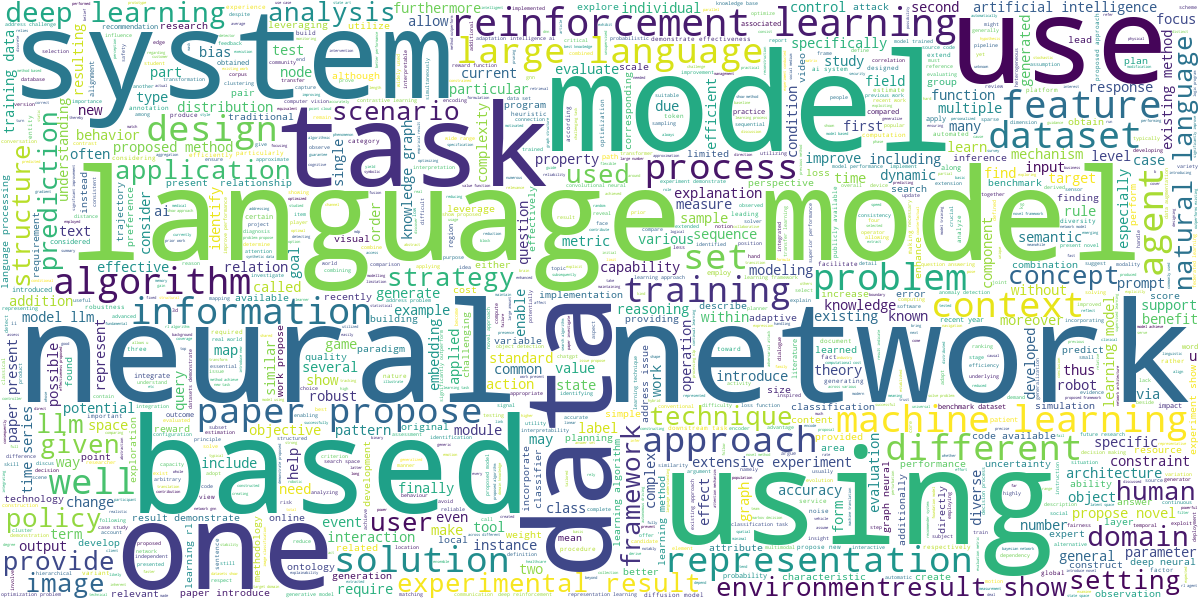

In [128]:
wordcloud.to_image()

### Frequency Distribution of Words

In [153]:
def get_freq_dist(data):
    words = [word for row in data['Processed Summary'] for word in row]
    return FreqDist(words)

def plot_freq_dist(freq_dist, n=30):
    freq_dist.plot(n, cumulative=False)
    plt.show()

In [154]:
freq_dist = get_freq_dist(data)

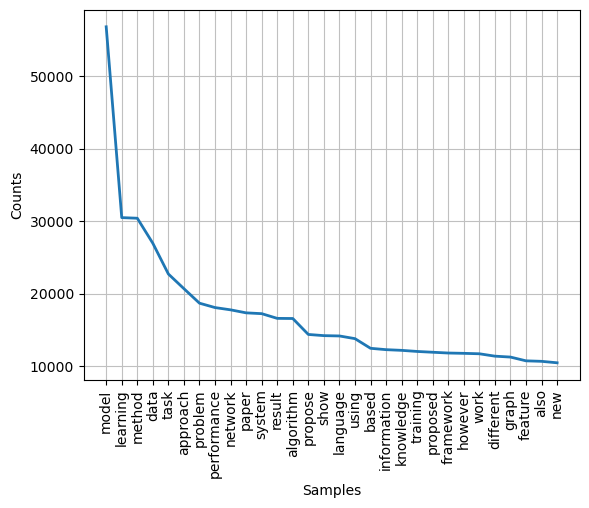

In [155]:
plot_freq_dist(freq_dist)

### Histogram of text length

In [133]:
data['Summary Length'] = data.apply(lambda row: get_summary_length(row['Summary']), axis=1)

In [134]:
data['Processed Summary Length'] = data.apply(lambda row: len(row['Processed Summary']), axis=1)

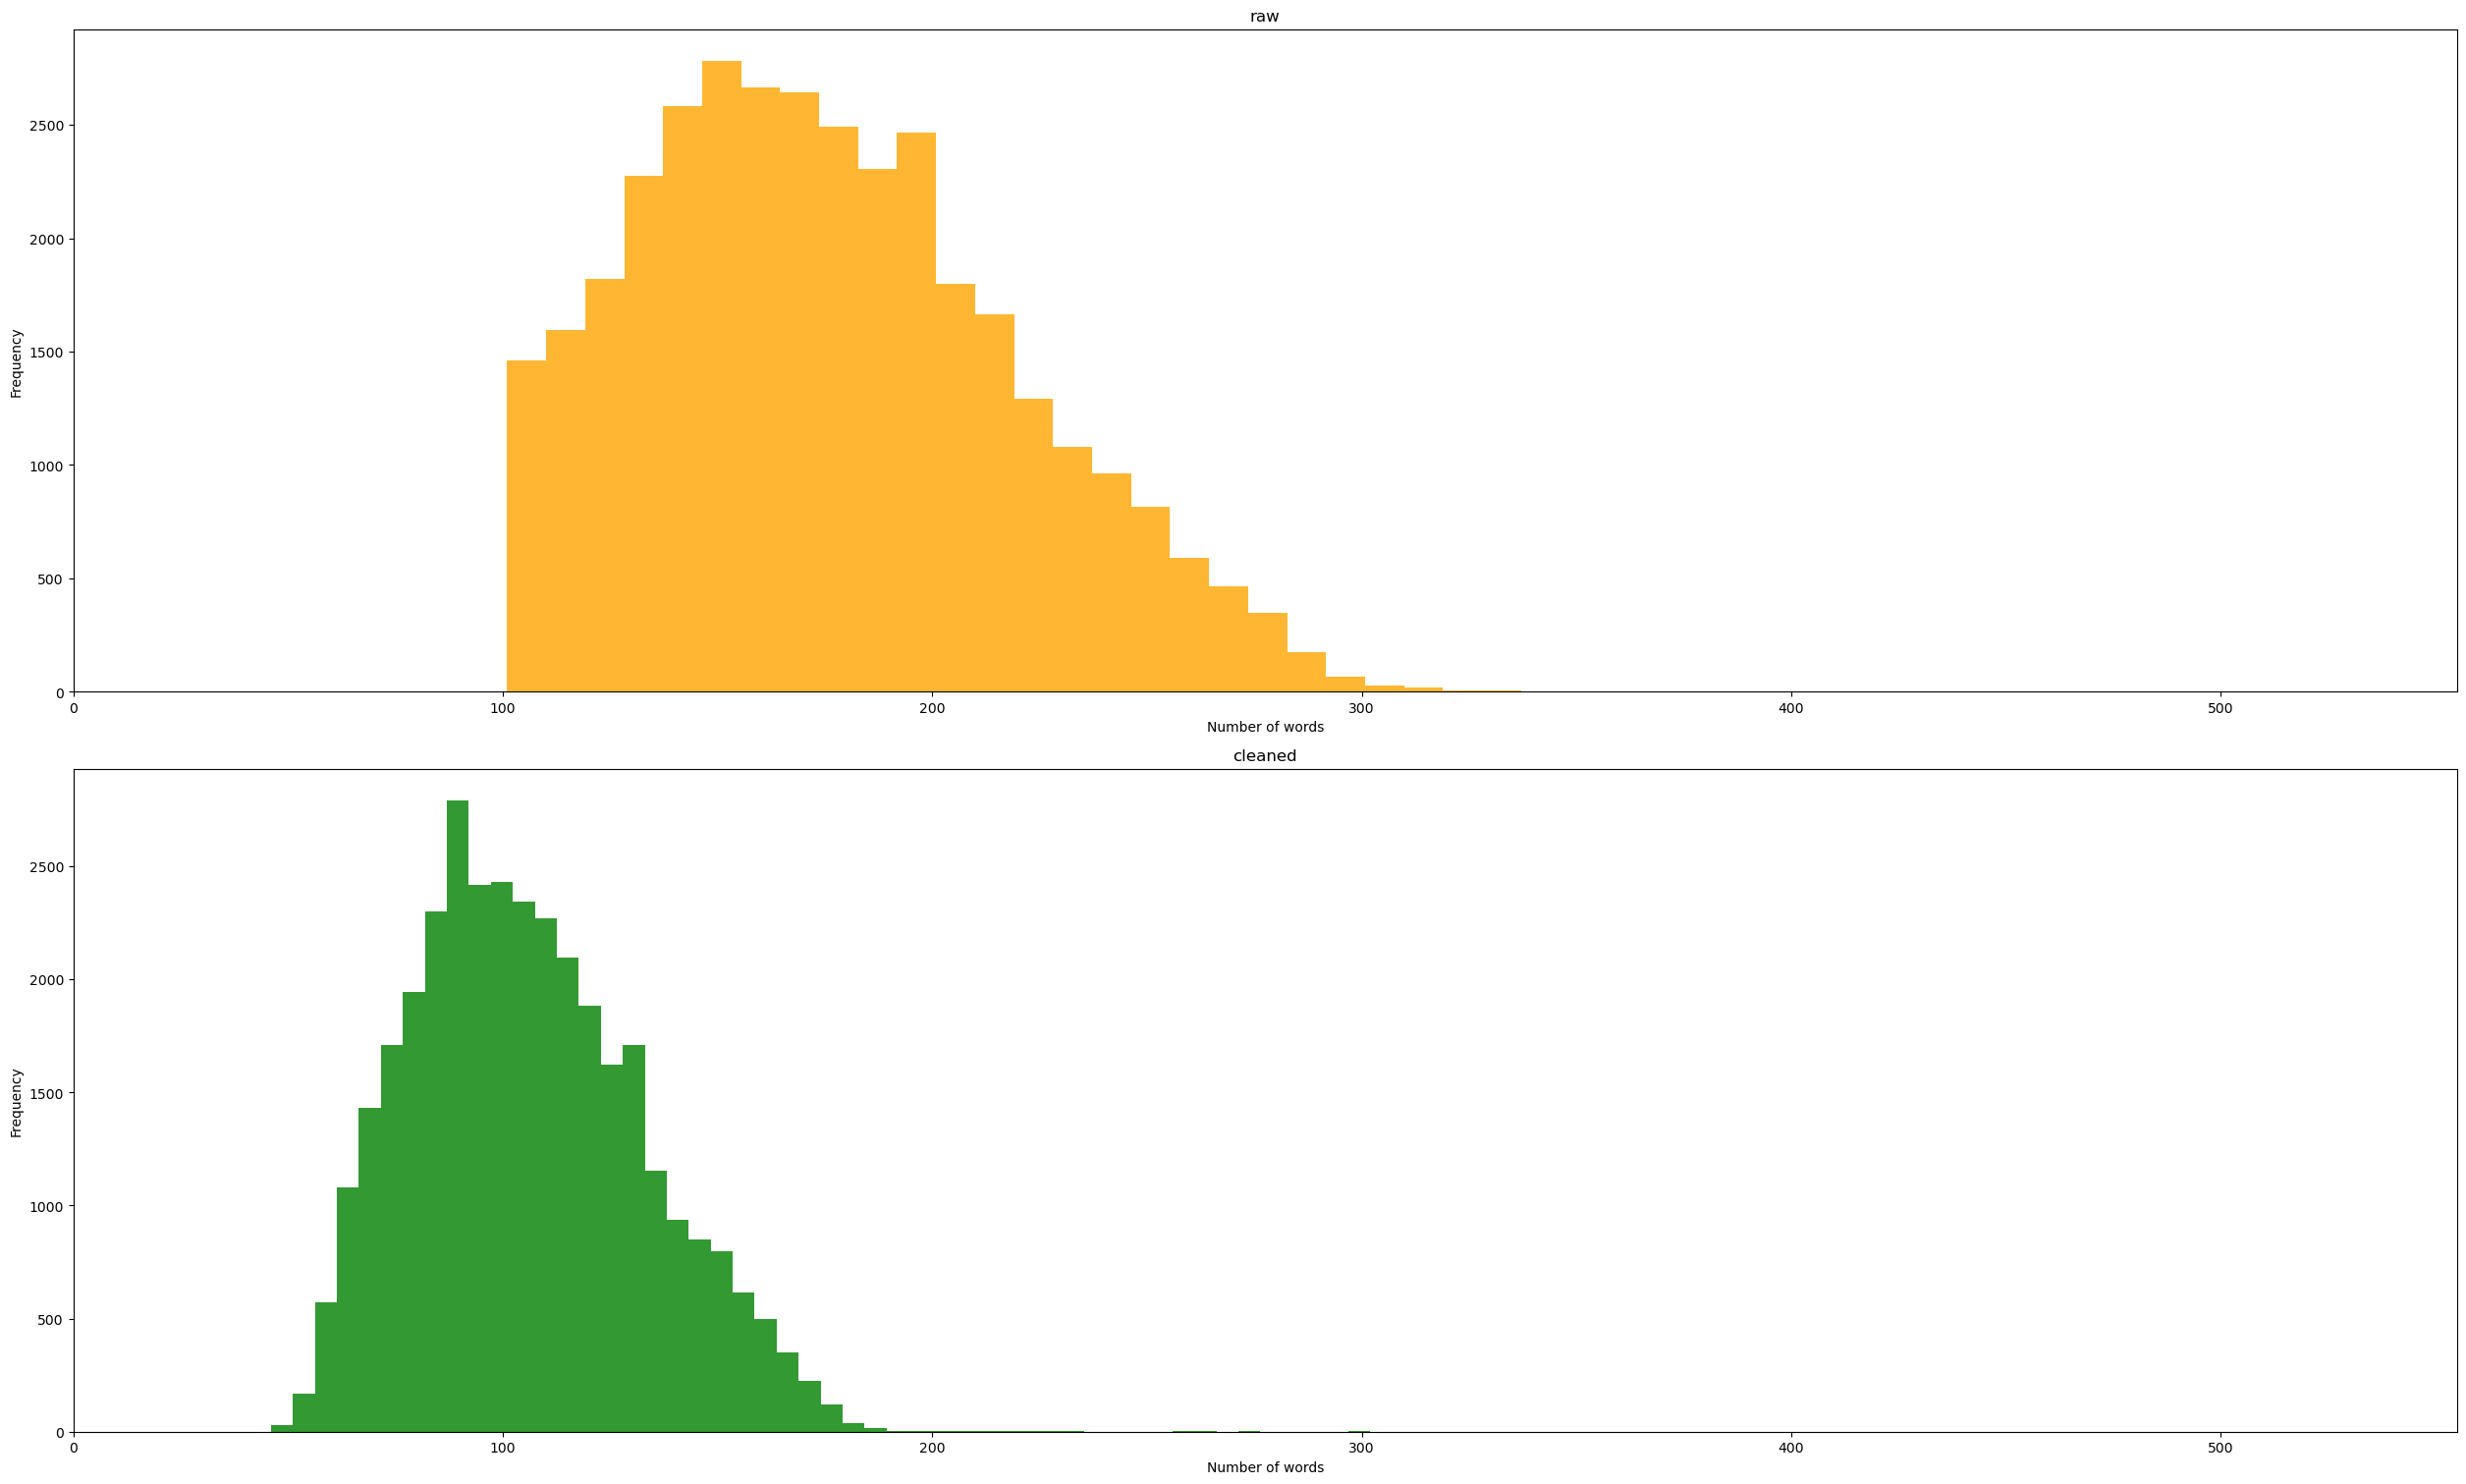

In [152]:
fig, axs = plt.subplots(2, 1, figsize=(25, 15), constrained_layout=True)

# Raw summaries
axs[0].hist(data['Summary Length'], bins=50, color='orange', alpha=0.8)
axs[0].set_title('raw')
axs[0].set_xlabel('Number of words')
axs[0].set_ylabel('Frequency')

# Cleaned summaries
axs[1].hist(data['Processed Summary Length'], bins=50, color='green', alpha=0.8)
axs[1].set_title('cleaned')
axs[1].set_xlabel('Number of words')
axs[1].set_ylabel('Frequency')

max_x = max(data['Summary Length'].max(), data['Processed Summary Length'].max())
axs[0].set_xlim(0, max_x)
axs[1].set_xlim(0, max_x)

plt.show()

### N-Gram Analysis (WordCloud)

#### Digrams

In [202]:
def generate_word_cloud(data, ngram=2):
    text = ' '.join([' '.join(row) for row in data['Processed Summary']])
    vectorizer = CountVectorizer(ngram_range=(ngram, ngram))
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    frequencies = X.toarray().sum(axis=0)
    ngrams_freq = dict(zip(ngrams, frequencies))
    wordcloud = WordCloud(
        background_color="white",
        max_words=10000,
        contour_width=5,
        contour_color='steelblue',
        width=1200,
        height=600
    )
    return wordcloud.generate_from_frequencies(ngrams_freq)

In [203]:
wordcloud = generate_word_cloud(data)

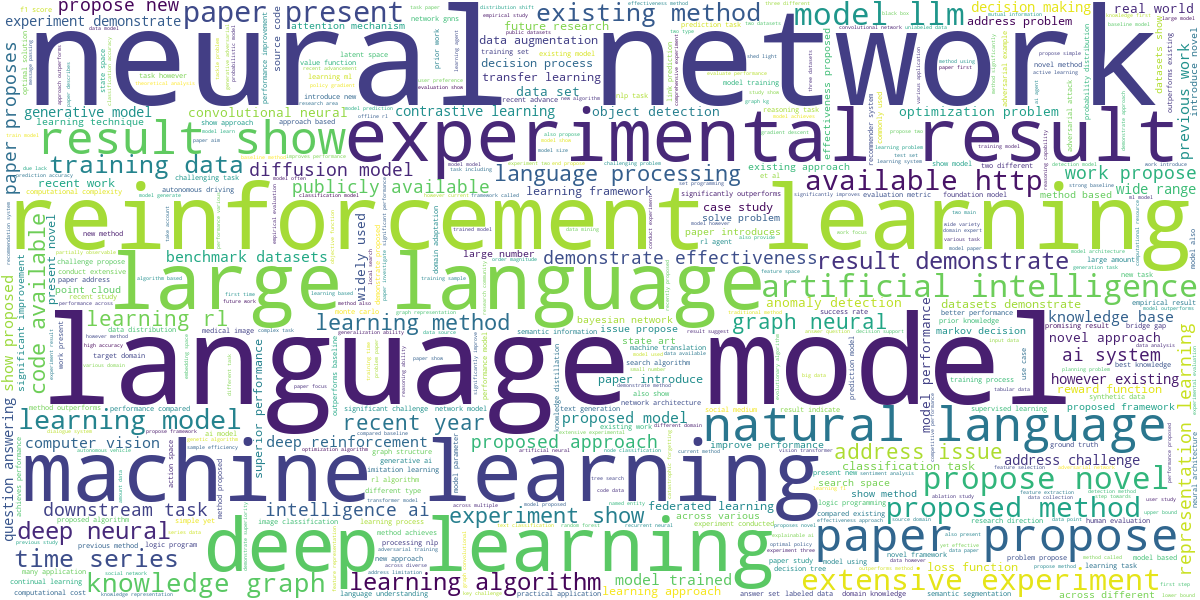

In [204]:
wordcloud.to_image()

#### Trigrams

In [205]:
wordcloud = generate_word_cloud(data, 3)

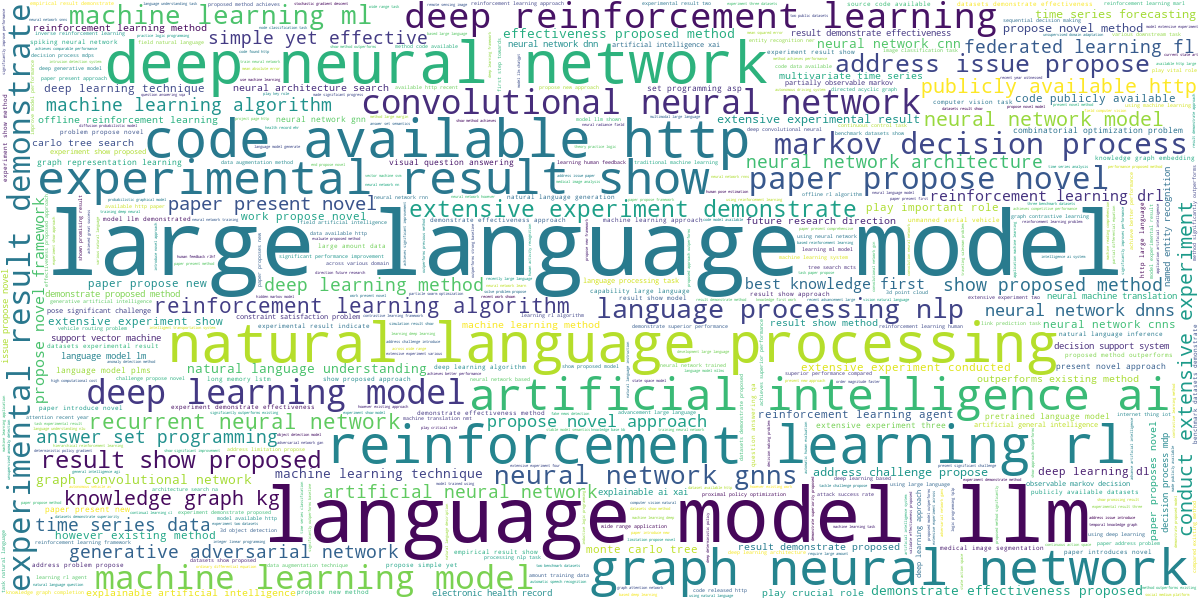

In [206]:
wordcloud.to_image()